Fieldtrip: OPM oddball analysis with source localization using beamformer
=========================================================================

Lead authors: Hadi Zaatiti hadi.zaatiti@nyu.edu, Osama Abdullah, osama.abdullah@nyu.edu

This notebook is to be run in MATLAB, while having fieldtrip library installed.
It is a pipeline for processing the `oddball` experiment raw data, run frequency analysis in source space, source localization using Beamformer technique.
The `oddball` code experiment in Psychtoolbox can be found here:

[Oddball experiment page](https://meg-pipeline.readthedocs.io/en/latest/3-experimentdesign/experiments/6-exp-sound.html)

[Oddball PsychToolBox code for OPM system](https://github.com/hzaatiti-NYU/meg-pipeline/blob/main/experiments/psychtoolbox/sound/oddball/run_oddball_OPM.m)

Importing data and preprocessing
--------------------------------
The data used in this notebook is hosted on `NYU BOX`. Permissions are given upon request.

- Install the BOX app from [here](https://www.box.com/resources/downloads)
- Set an environment variable with name `MEG_DATA` to the path of the Data folder e.g.,
    - `C:\Users\user_name\Box\MEG\Data`
    - or `C:\Users\user_name\Box\Data`

Each experiment run using the OPM system generates a `.fif` file. We will work with the `.fif` generated by the Fieldline OPM file set below, the .fif file contains all sensor measurements during the experiments and trigger channels data.

In [37]:
% Read the environment variable to NYU BOX
MEG_DATA_FOLDER = getenv('MEG_DATA');

% Set path to OPM .fif file of sub-03
DATASET_PATH = [MEG_DATA_FOLDER, 'oddball\sub-03\meg-opm\sub-03_ses-2024-05-24_meg_raw.fif'];

% Set path to computed .mat variables, these has been obtained by executing this pipeline and 
% will allow you to skip steps if you wish to execute a particular cell
LOAD_PATH = [MEG_DATA_FOLDER, 'oddball\derivatives\opm_oddball_pipeline\sub-03\'];


% Experiment your own test and save your variables in a folder of your choice, choose the folder where to save your variables
% We will also use it to copy variables from LOAD_PATH and use them in the notebook if needed
SAVE_PATH = 'docs\source\5-pipeline\notebooks\fieldtrip\fieldtrip_oddball_opm_data\';

try
    cd(SAVE_PATH)
catch
end

% Copy all pre-computed variables to your SAVE_PATH, skip this if you want to run the entire notebook yourself
copyfile(LOAD_PATH, pwd)

If you are testing this notebook and want to execute a specific cell, the required variables necessary to execute the cell will be loaded from the latter directory.
If you are doing your own experiment and want to load your own data, then set the Saving folder to any folder of your choice where you would like to save the .mat variables.
If you would like to execute a specific cell in this notebook and do not want to run the whole notebook, simply execute the cell, it will load the pre-computed variables from `LOAD_PATH`.

Then, we import the raw data and display the header information.
The .fif file imported here is the one generated from the OPM system.

In [6]:
%% Data initialisation

% Tutorial reference: https://www.fieldtriptoolbox.org/tutorial/eventrelatedaveraging/

cfg                         = [];
cfg.dataset = DATASET_PATH;

data_all = ft_preprocessing(cfg);

% Read the header
hdr = ft_read_header(cfg.dataset);

% Display the header information
disp(hdr);


% The electrode positions for opm can be found in fieldtripdir/template/grad/fieldlinebeta2.mat
% Remind that the positions of the OPM sensor can vary changed on the radial axis of the brain (By pushing OPM sensors in or out)
% So, the sensor layout is changed for every participant according to the axial position of the sensors
% The specific positions of the OPM sensors that are fit to the subjet's head is found in data_all.grad

-------------------------------------------------------------------------------------------
FieldTrip is developed by members and collaborators of the Donders Institute for Brain,
Cognition and Behaviour at Radboud University, Nijmegen, the Netherlands.

                          --------------------------
                        /                            \
                     ------------------------------------
                    /                                    \
          -------------------------------------------------
         /                            /\/\/\/\/\ 
         ---------------------------------------------------
                  |        F  i  e  l  d  T  r  i  p       |
                  ------------------------------------------
                   \                                      /
                     ------------------------------------
                          \            /
                            ----------

Please cite the FieldTrip re


Copyright (c) 2011, Matti Hamalainen and Alexandre Gramfort
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:
    * Redistributions of source code must retain the above copyright
      notice, this list of conditions and the following disclaimer.
    * Redistributions in binary form must reproduce the above copyright
      notice, this list of conditions and the following disclaimer in the
      documentation and/or other materials provided with the distribution.
    * Neither the name of the Massachusetts General Hospital nor the
      names of its contributors may be used to endorse or promote products
      derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FIT

 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392

Opening raw data file C:\Users\hz3752\Box\MEG\Data\oddball\sub-03\meg-opm\sub-03_ses-2024-05-24_meg_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_chantype.m' at line 198
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 2837
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392

processing channel { 'L202_bz' 'L302_bz' 'R102_bz' 'L404_bz' 'R103_bz' 'L505_bz' 'L203_bz' 'L606_bz' 'L101_bz' 'L208_bz' 'L204_bz' 'L303_bz' 'R107_bz' 'L405_bz' 'L103_bz' 'L502_bz' 'R104_bz' 'L307_bz' 'R105_bz' 'L403_bz' 'L102_bz' 'L402_bz' 'L104_bz' 'L604_bz' 'R101_bz' 'L304_bz' 'L201_bz' 'L306_bz' 'L205_bz' 'L305_bz' 'di31' 'L105_bz' 'L503_bz' 'R307_bz' 'R205_bz' 'L214_bz' 'R301_bz' 'L111_bz' 'R202_bz' 'L113_bz' 'R402_bz' 'R211_bz' 'R203_bz' 'R408_bz' 'R302_bz' 'R213_bz' 'R206_bz' 'R113_bz' 'R304_bz' 'R210_bz' 'R208_bz' 'R209_bz' 'R204_bz' 'R212_bz' 'R305_bz' 'R409_bz' 'R303_bz' 'R308_bz' 'R207_bz' 'R309_bz' 'R201_bz' 'R407_bz' 'R306_bz' 'R311_bz' 'R401_bz' 'R502_bz' 'R504_bz' 'R605_bz' 'R603_bz' 'R503_bz' 'R405_bz' 'R506_bz' 'R507_bz' 'R403_bz' 'R604_bz' 'R11

 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941

Opening raw data file C:\Users\hz3752\Box\MEG\Data\oddball\sub-03\meg-opm\sub-03_ses-2024-05-24_meg_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_chantype.m' at line 198
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 2837

          label: {109x1 cell}
         nChans: 109
             Fs: 5000
           grad: [1x1 struct]
       nSamples: 1368100
    nSamplesPre: 0
        nTrials: 1
           orig: [1x1 struct]
       chantype: {109x1 cell}
       chanunit: {109x1 cell}



Defining trials
---------------
Remind that in oddball task we had three kind of stimulus:

- a 500 Hz a high frequency noise
- a white noise
- a low frequency 200Hz noise
  
We will read the triggers from the data and plot them. 
Channel `di31` is the digital stimulus channel on the OPM, it can take any values 0 to 256.
The current NYUAD lab setup is limited in number of digital pins to 27 and doesn't use the full 36 of the OPM.
The PsychToolBox odddball experiment has been coded so that the triggers for the:

- the 200Hz Low Frequency (LF) tone has a value of *1* on `di31` channel
- the White Noise (WN) has a value of *2* on `di31` channel
- the 500Hz High Frequency (HF) tone has a value of *3* on the `di31` channel

The following plot is then obtained showing the triggers with respect to time in a GUI that can be zoomed in and out.

 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392

Opening raw data file C:\Users\hz3752\Box\MEG\Data\oddball\sub-03\meg-opm\sub-03_ses-2024-05-24_meg_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.
processing channel { 'di31' }
reading and preprocessing
Reading 0 ... 1368099  =      0.000 ...   273.620 secs... [done]
reading and preprocessing trial 1 from 1
the call to "ft_preprocessing" took 5 seconds


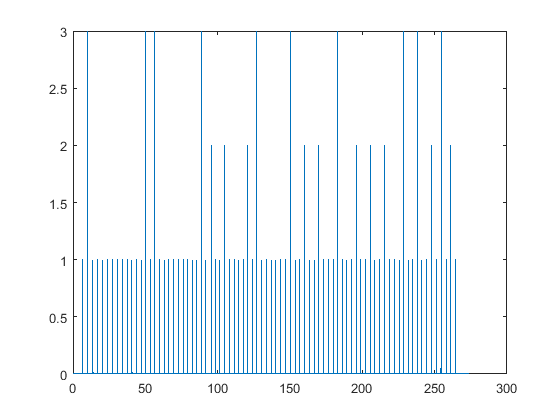

In [7]:
%% Plot the trigger channel

cfg = [];
cfg.dataset = DATASET_PATH;
cfg.channel = 'di31';
data=ft_preprocessing(cfg);
figure;plot(data.time{1},data.trial{1});

We will now define the trials, each trial is a set of the time series of the sensors data limited to a time segment of length  \[`prestim`,`poststim`\] where the `0` time value on that segment corresponds exactly to a trigger event. For the oddball task we would usually want to identify a strong p100 and a less intense p300. So we will make sure we take a `poststim` higher than 300ms.


The reaction of the brain we are interested in analysing lays within the time interval POST = \[0, `poststim`\]. The sensor data of the latter, can be corrected against a baseline to increase the SNR. The `baselinewindow = [-x, 0]` is a time interval where `x>0`, picked exactly prior to the stimulus. For the baseline correction operation, a `demean` is applied, this operation does the following for each trial:
- computes the mean value of the data at the baseline window time defined in `baselinewindow`
- substracts from the data at the POST interval

A `detrend` is applied when a low frequency noise is carrying the signal upwards or downwards linearly with time.
The `lpfilter` is commented but could be used if needed. Remind that any noise filter removes a part of the data, avoid using noise filters unless justified (e.g., eyeblink removal, EKG,...). We recommend to perform your analysis fully then add necessary noise filters and see the effect they have on the analysis.

In [11]:
%% Defining Trials

%value = 1 is the 500 Hz audio
%value = 2 is the white noise
%value = 3 is the 200 Hz audio

cfg = [];
cfg.dataset                 = DATASET_PATH;
cfg.trialfun = 'ft_trialfun_general';                 % this is the default trial type
cfg.trialdef.eventtype = 'di31';                      % Specify the trigger channel
cfg.trialdef.eventvalue = [1, 2, 3];                  % Define the value of the trigger
cfg.channel = {'L*', 'R*'};                           % Choose the OPM channels (that starts with L or R followed by an expression, * is a wildcharacter)
cfg.preproc.demean     = 'yes';
cfg.preproc.detrend = 'yes';
cfg.preproc.baselinewindow = [-0.2 0];
%cfg.lpfilter   = 'yes';                              % apply lowpass filter
%cfg.lpfreq     = 35;                                 % lowpass at 35 Hz.
cfg.trialdef.prestim        = 0.5; % in seconds
cfg.trialdef.poststim       = 1.2; % in seconds

cfg = ft_definetrial(cfg);

data = ft_preprocessing(cfg);

evaluating trial function 'ft_trialfun_general'
reading the header from 'C:\Users\hz3752\Box\MEG\Data\oddball\sub-03\meg-opm\sub-03_ses-2024-05-24_meg_raw.fif'


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198

Opening raw data file C:\Users\hz3752\Box\MEG\Data\oddball\sub-03\meg-opm\sub-03_ses-2024-05-24_meg_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_chantype.m' at line 198
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 2837
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198

reading the events from 'C:\Users\hz3752\Box\MEG\Data\oddball\sub-03\meg-opm\sub-03_ses-2024-05-24_meg_raw.fif'


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_event.m' at line 1685
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 117
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_event.m' at line 1685
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 117
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_event.m' at line 1685
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 117
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_event.m' at line 1685
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 117
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198

Opening raw data file C:\Users\hz3752\Box\MEG\Data\oddball\sub-03\meg-opm\sub-03_ses-2024-05-24_meg_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.
Reading 0 ... 1368099  =      0.000 ...   273.620 secs... [done]
found 80 events
created 80 trials
the call to "ft_definetrial" took 5 seconds


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392

Opening raw data file C:\Users\hz3752\Box\MEG\Data\oddball\sub-03\meg-opm\sub-03_ses-2024-05-24_meg_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_chantype.m' at line 198
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 2837
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392

processing channel { 'L202_bz' 'L302_bz' 'R102_bz' 'L404_bz' 'R103_bz' 'L505_bz' 'L203_bz' 'L606_bz' 'L101_bz' 'L208_bz' 'L204_bz' 'L303_bz' 'R107_bz' 'L405_bz' 'L103_bz' 'L502_bz' 'R104_bz' 'L307_bz' 'R105_bz' 'L403_bz' 'L102_bz' 'L402_bz' 'L104_bz' 'L604_bz' 'R101_bz' 'L304_bz' 'L201_bz' 'L306_bz' 'L205_bz' 'L305_bz' 'L105_bz' 'L503_bz' 'R307_bz' 'R205_bz' 'L214_bz' 'R301_bz' 'L111_bz' 'R202_bz' 'L113_bz' 'R402_bz' 'R211_bz' 'R203_bz' 'R408_bz' 'R302_bz' 'R213_bz' 'R206_bz' 'R113_bz' 'R304_bz' 'R210_bz' 'R208_bz' 'R209_bz' 'R204_bz' 'R212_bz' 'R305_bz' 'R409_bz' 'R303_bz' 'R308_bz' 'R207_bz' 'R309_bz' 'R201_bz' 'R407_bz' 'R306_bz' 'R311_bz' 'R401_bz' 'R502_bz' 'R504_bz' 'R605_bz' 'R603_bz' 'R503_bz' 'R405_bz' 'R506_bz' 'R507_bz' 'R403_bz' 'R604_bz' 'R111_bz' '

Display the trials and visually inspect them.

In [12]:
%% Visualise trials

cfg = ft_databrowser(cfg, data);

the input is raw data with 96 channels and 80 trials


 In 'C:\Users\hz3752\Documents\fieldtrip\ft_redefinetrial.m' at line 268
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_databrowser.m' at line 336

the call to "ft_redefinetrial" took 0 seconds
the input is raw data with 96 channels and 80 trials
detected   0 visual artifacts
the different artifact types correspond to the following colors:
  visual = pink
the different event types correspond to the following colors:
  di31 = black
------------------------------------------------------------------------------------
You can use the following keyboard buttons in the databrowser
1-9                : select artifact type 1-9
shift 1-9          : select previous artifact of type 1-9 (does not work with numpad)
alt 1-9            : select next artifact of type 1-9
arrow-left         : previous trial
arrow-right        : next trial
shift arrow-up     : increase vertical scaling
shift arrow-down   : decrease vertical scaling
shift arrow-left   : increase horizontal scaling
shift arrow-down   : dec

The following GUI will appear allowing you to select artifacts, pass through trials and make a visual inspection.
Use the above keyboard shortcut to properly use the GUI.
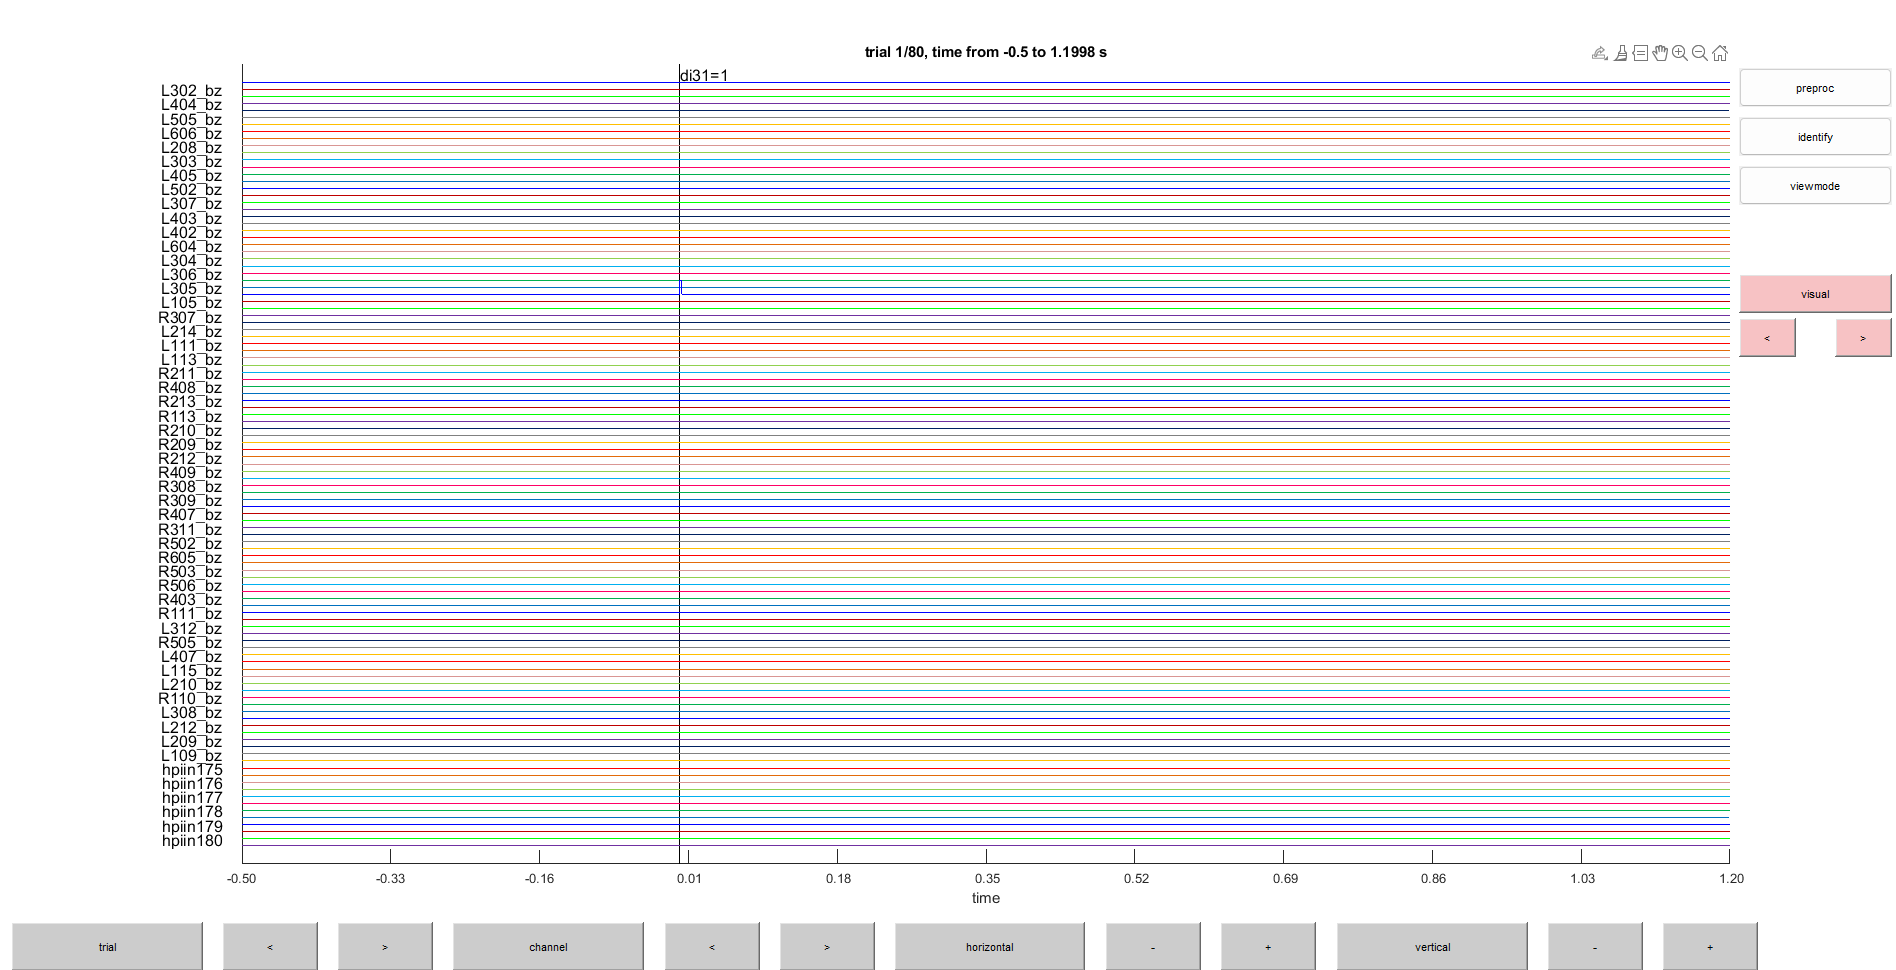

There is three types of trials, we have now to group them separately according to the type of stimulus.
This will allow us to constrast trials of one type with trials of another type.
For the oddball task we would like to see the brain waves contrast between the WN, HF and the LF.

In [13]:
%% Filter trials on specific type (1)

cfg = [];
cfg.trials = data.trialinfo == 1;
dataLF = ft_redefinetrial(cfg, data);

save dataLF dataLF

the input is raw data with 96 channels and 80 trials
selecting 60 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_redefinetrial" took 0 seconds


In [14]:
%% Filter trials on specific type (2)

cfg = [];
cfg.trials = data.trialinfo == 2;
dataWN = ft_redefinetrial(cfg, data);

save dataWN dataWN

the input is raw data with 96 channels and 80 trials
selecting 10 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_redefinetrial" took 0 seconds


In [15]:
%% Filter trials on specific type (3)

cfg = [];
cfg.trials = data.trialinfo == 3;
dataHF = ft_redefinetrial(cfg, data);

save dataHF dataHF

the input is raw data with 96 channels and 80 trials
selecting 10 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_redefinetrial" took 0 seconds


Some trials and channels might be extremely noisy, a check is made in the following to remove the trials and bad channels.
Simply click on bad trials first, then on bad channels. (Never exclude channels first, but always trials)

In [5]:
%% Visual Inspection LF


cfg = [];
cfg.method='summary';
cfg.channel = {'L*', 'R*'};
 
dataLF_rej = ft_rejectvisual(cfg, dataLF);


save dataLF_rej dataLF_rej

the input is raw data with 109 channels and 60 trials
before GUI interaction: 60 trials marked to INCLUDE, 0 trials marked to EXCLUDE
before GUI interaction: 96 channels marked to INCLUDE, 13 channels marked to EXCLUDE
showing a summary of the data for all channels and trials
computing var [--|                                                        computing var [------------------------------/                            computing var [------------------------------------------------------------]
after GUI interaction: 58 trials marked to INCLUDE, 2 trials marked to EXCLUDE
after GUI interaction: 94 channels marked to INCLUDE, 15 channels marked to EXCLUDE
the following channels were removed: di31, R308_bz, L115_bz, hpiin175, hpiout175, hpiin176, hpiout176, hpiin177, hpiout177, hpiin178, hpiout178, hpiin179, hpiout179, hpiin180, hpiout180
the following trials were removed: 10, 34
the call to "ft_selectdata" took 0 seconds
the call to "ft_rejectvisual" took 67 seconds


The following window pops up, choose a metric to discriminate bad trials first then bad channels.
Example: for the `var` metric, we would see certain trials having a very different variance than the majority of the trials (bottom left window). Click that trial to eliminate it. Once done, do the same with clicking on the top right window to eliminate bad channels.

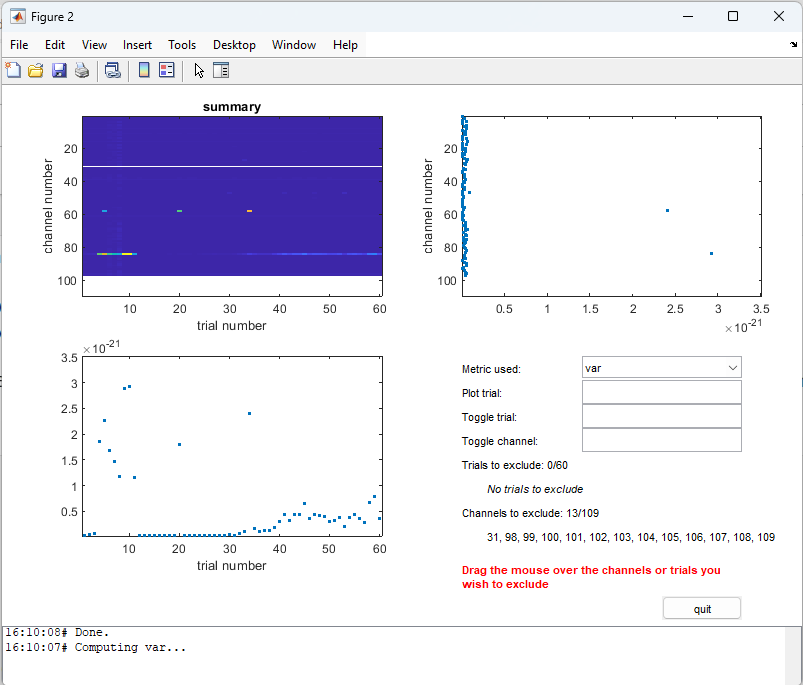

We will now do the same with the HF and WN trials.

In [ ]:
%% Visual Inspection HF

cfg = [];
cfg.method='summary'; % Start first with eliminating trials rather than channels
cfg.channel = {'L*', 'R*'};
 
dataHF_rej = ft_rejectvisual(cfg, dataHF);

save dataHF_rej dataHF_rej

In [ ]:
%% Visual Inspection WN


cfg = [];
cfg.method='summary';
cfg.channel = {'L*', 'R*'};
 
dataWN_rej = ft_rejectvisual(cfg, dataWN);

save dataWN_rej dataWN_rej

Time-lock analysis
------------------
It is known that in an auditory task, we should see the auditory cortex activated 100ms after the audio stimulus (p100) has been presented and perhaps a p300 at 300ms. However, the latter is radial and is better captured by EEG than by MEG.
In the sequel, we will focus on showing this result.
Start by first computing the averaged Event-Related Fields (ERF) over the trials for each trial type.
The ERF are fluctuations in the magnetic field generated by the brain occuring in response to the stimuli.
This step takes a few minutes to complete.

In [38]:
load dataLF_rej dataLF_rej
load dataHF_rej dataHF_rej
load dataWN_rej dataWN_rej

cfg = [];

avgLF = ft_timelockanalysis(cfg, dataLF_rej);
avgHF = ft_timelockanalysis(cfg, dataHF_rej);
avgWN = ft_timelockanalysis(cfg, dataWN_rej);

% Optional: Save if you are experimenting different configurations
%save avgLF avgLF
%save avgHF avgHF
%save avgWN avgWN

the input is raw data with 94 channels and 52 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_timelockanalysis" took 1 seconds
the input is raw data with 94 channels and 10 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_timelockanalysis" took 0 seconds
the input is raw data with 94 channels and 10 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_timelockanalysis" took 0 seconds


In [39]:
load avgLF avgLF
load avgHF avgHF
load avgWN avgWN

We can now plot the averaged trial in sensor space for each type of trials. From the pop-up window, drag a box selection over a number of sensors, then click one of them to see the trial-averaged behavior of the data over time.

the call to "ft_selectdata" took 0 seconds
reading layout from file fieldlinebeta2bz_helmet.mat
reading 'layout' from file 'fieldlinebeta2bz_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


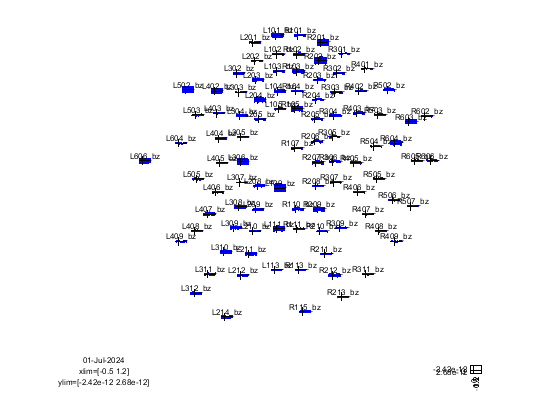

the call to "ft_multiplotER" took 1 seconds


In [15]:
%% Plotting the averaged LF trials

% This will show the average over all trials for each channel for only one
% trigger condition

cfg = [];
cfg.showlabels = 'yes';
cfg.fontsize = 6;
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
% cfg.ylim = [-3e-13 3e-13];
ft_multiplotER(cfg, avgLF);

the call to "ft_selectdata" took 0 seconds
reading layout from file fieldlinebeta2bz_helmet.mat
reading 'layout' from file 'fieldlinebeta2bz_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


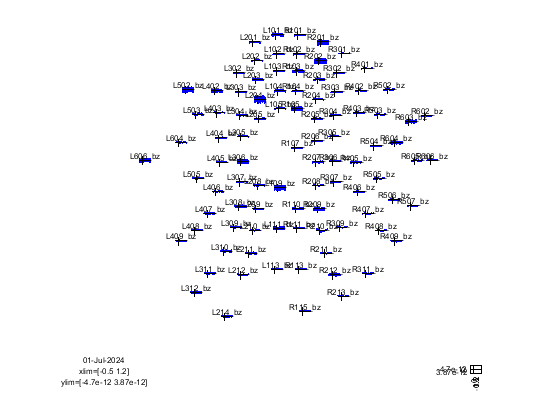

the call to "ft_multiplotER" took 1 seconds


In [16]:
%% Plotting the averaged WN trials

% This will show the average over all trials for each channel for only one
% trigger condition

cfg = [];
cfg.showlabels = 'yes';
cfg.fontsize = 6;
cfg.layout = 'fieldlinebeta2bz_helmet.mat'; %Perhaps we can use the layout from the .fif
% cfg.ylim = [-3e-13 3e-13];
ft_multiplotER(cfg, avgWN);

the call to "ft_selectdata" took 0 seconds
reading layout from file fieldlinebeta2bz_helmet.mat
reading 'layout' from file 'fieldlinebeta2bz_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


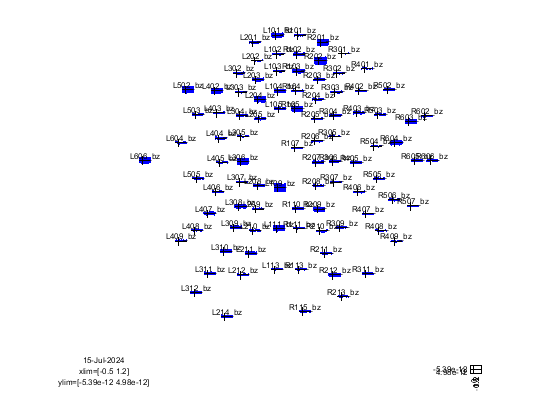

the call to "ft_multiplotER" took 1 seconds


In [16]:
%% Plotting the averaged HF trials

% This will show the average over all trials for each channel for only one
% trigger condition

cfg = [];
cfg.showlabels = 'yes';
cfg.fontsize = 6;
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
% cfg.ylim = [-3e-13 3e-13];
ft_multiplotER(cfg, avgHF);

the input is timelock data with 94 channels and 8500 timebins
applying baseline correction on avg
baseline correction invalidates previous variance estimate, removing var
the call to "ft_timelockbaseline" took 0 seconds
the input is timelock data with 94 channels and 8500 timebins
applying baseline correction on avg
baseline correction invalidates previous variance estimate, removing var
the call to "ft_timelockbaseline" took 0 seconds
the input is timelock data with 94 channels and 8500 timebins
applying baseline correction on avg
baseline correction invalidates previous variance estimate, removing var
the call to "ft_timelockbaseline" took 0 seconds
the call to "ft_selectdata" took 0 seconds
reading layout from file fieldlinebeta2bz_helmet.mat
reading 'layout' from file 'fieldlinebeta2bz_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


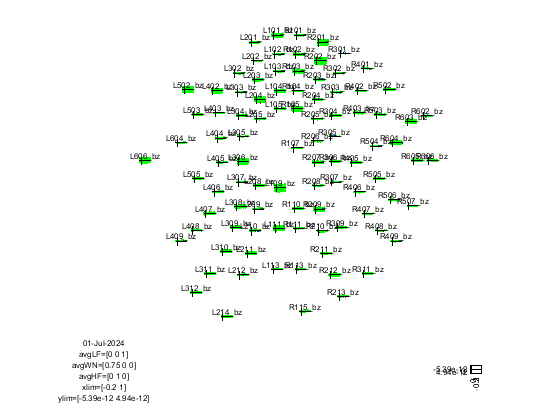

the call to "ft_multiplotER" took 1 seconds


In [18]:
%% Plotting all data

% Same as before but for all the stimulus type

cfg = [];
cfg.showlabels = 'yes';
cfg.fontsize = 6;

%This is saved under Fieldtrip_dir/template/layout
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
cfg.baseline = [-0.2 0];
cfg.xlim = [-0.2 1.0];
% cfg.ylim = [-3e-13 3e-13];
ft_multiplotER(cfg, avgLF, avgWN, avgHF);

We can also plot the trial & time average in sensor space. the `cfg.xlim` specifies which window of time should we time-average on.
The `0` value corresponds to the stimulus presentation time, so in order to see the ERP, we pick slightly after that includes the 100ms lapse.

reading layout from file fieldlinebeta2bz_helmet.mat
reading 'layout' from file 'fieldlinebeta2bz_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


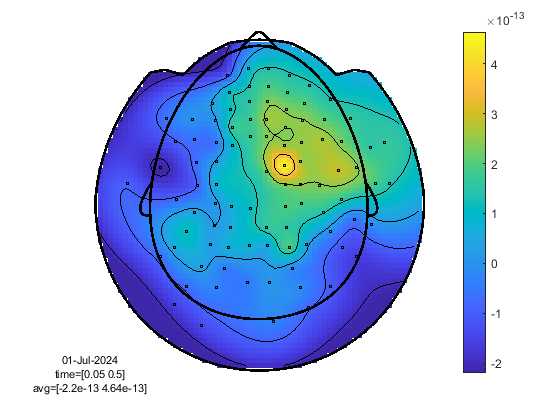

the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotER" took 2 seconds
reading layout from file fieldlinebeta2bz_helmet.mat
reading 'layout' from file 'fieldlinebeta2bz_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


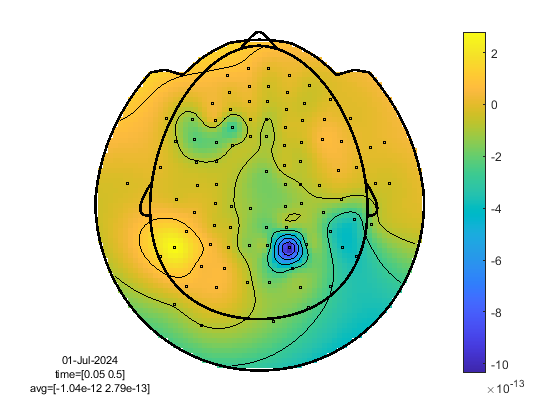

the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotER" took 0 seconds
reading layout from file fieldlinebeta2bz_helmet.mat
reading 'layout' from file 'fieldlinebeta2bz_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


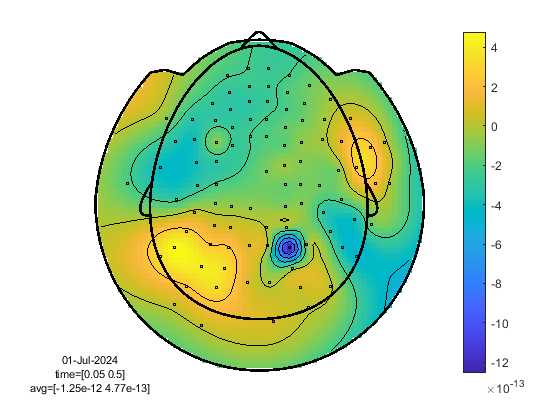

the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotER" took 0 seconds


In [20]:
%% Plotting in space

% for a single trial type, for each channel, average over time the trial
% and plot the average value on the helmet

% You can still see the time behavior when clicking on one sensor

%LF
cfg = [];
cfg.xlim = [0.05 0.5];
cfg.colorbar = 'yes';
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
ft_topoplotER(cfg, avgLF);


%White Noise

cfg = [];
cfg.xlim = [0.05 0.5];
cfg.colorbar = 'yes';
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
ft_topoplotER(cfg, avgWN);


%High Frequency

cfg = [];
cfg.xlim = [0.05 0.5];
cfg.colorbar = 'yes';
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
ft_topoplotER(cfg, avgHF);

The above plots are contrasted with a baseline, but we would like now to contrast the HF (or WN) trials with the LF ones.

the call to "ft_selectdata" took 0 seconds
selecting avg from the first input argument
the call to "ft_math" took 1 seconds
the call to "ft_selectdata" took 0 seconds
reading layout from file fieldlinebeta2bz_helmet.mat
reading 'layout' from file 'fieldlinebeta2bz_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


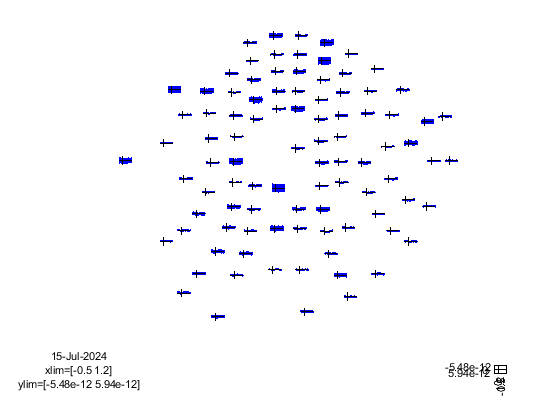

the call to "ft_multiplotER" took 0 seconds


In [18]:
%% Plotting the contrast

cfg = [];
cfg .parameter = 'avg';
cfg.operation = 'x1-x2';
% Correct by reducing the number of trials of the LF
% When we contrast, we do not want to bias one type of trial over the other if one type of trials has a higher number of trials than another type, which is the case in this experiment
diff = ft_math(cfg, avgHF, avgLF);

cfg.layout = 'fieldlinebeta2bz_helmet.mat';

ft_multiplotER(cfg,diff);

We can plot the contrast at different time points around the reaction time.

reading layout from file fieldlinebeta2bz_helmet.mat
reading 'layout' from file 'fieldlinebeta2bz_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


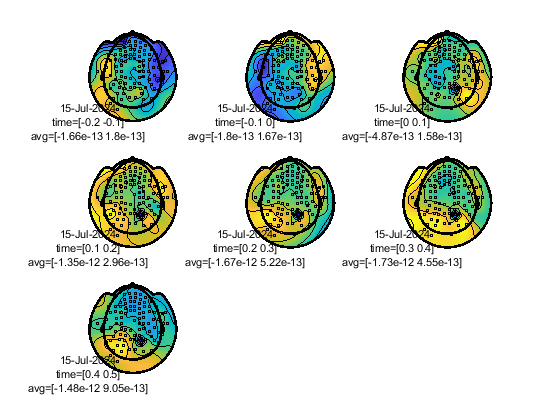

the call to "ft_selectdata" took 0 seconds
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 1 seconds
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 0 seconds
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 0 seconds
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 0 seconds
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 0 seconds
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 0 seconds
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 0 seconds
the call to "ft_top

In [19]:
%% Topoplot on diff

cfg        = [];
cfg.xlim   = [-0.2 : 0.1 : 0.5];  % Define 12 time intervals
%cfg.zlim   = [-2e-13 2e-13];      % Set the 'color' limits.
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
ft_topoplotER(cfg, diff);

reading layout from file fieldlinebeta2bz_helmet.mat
reading 'layout' from file 'fieldlinebeta2bz_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


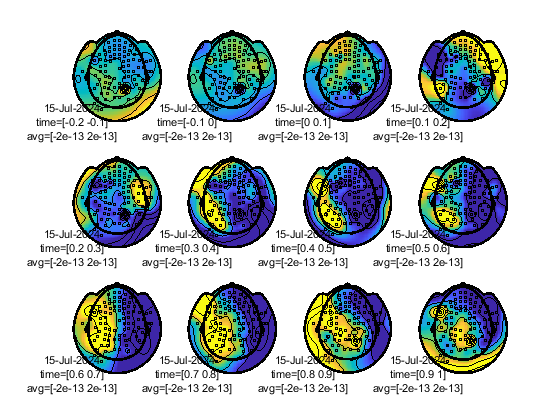

the call to "ft_selectdata" took 0 seconds
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 0 seconds
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 0 seconds
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 0 seconds
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 0 seconds
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 0 seconds
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 0 seconds
the call to "ft_prepare_layout" took 0 seconds
the call to "ft_selectdata" took 0 seconds
the call to "ft_topoplotTFR" took 0 seconds
the call to "ft_pre

In [20]:
%Same as before, but not plotting the average rather one of the trial types at specific times

cfg        = [];
cfg.xlim   = [-0.2 : 0.1 : 1.0];  % Define 12 time intervals
cfg.zlim   = [-2e-13 2e-13];      % Set the 'color' limits.
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
ft_topoplotER(cfg, avgWN);

Source localization: MRI Segmentation and Coregistration
--------------------------------------------------------

We are now ready to perform source localization given the subject anatomical T1-MRI scan.
Start by loading the MRI and defining the coordinate system.


In [29]:
%% Load MRI data
MRI_PATH = [MEG_DATA_FOLDER, '\oddball\sub-03\anat\anat-T1w\', 'anat_T1w_anat-T1w_20231122111832_6.nii.gz'];
disp(MRI_PATH);
mri = ft_read_mri(MRI_PATH);
mri = ft_convert_units(mri, 'mm');

C:\Users\hz3752\Box\MEG\Data\oddball\sub-03\anat\anat-T1w\anat_T1w_anat-T1w_20231122111832_6.nii.gz
extracting compressed dataset to C:\Users\hz3752\AppData\Local\Temp\f5f5dae828d55101afd65c65c982666f\...
extracted dataset is located at C:\Users\hz3752\AppData\Local\Temp\f5f5dae828d55101afd65c65c982666f\anat_T1w_anat-T1w_20231122111832_6.nii
the coordinate system appears to be 'scanras'


The following line should initiate a GUI showing your MRI and a prompt in the MATLAB console to define the anatomical labels on the MRI.

The positive x-axis is pointing towards the right
The positive y-axis is pointing towards anterior
The positive z-axis is pointing towards superior


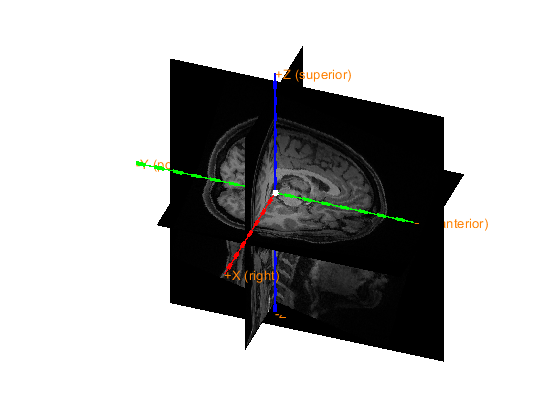

The axes are 150 mm long in each direction
The diameter of the sphere at the origin is 10 mm
The coordinate system is specified as "ras".


In [8]:
mri = ft_determine_coordsys(mri, 'interactive', 'yes');

You will be asked the following questions, to set correctly the labels of the X, Y, Z axis and origin of the coordinate system.
The answers are provided below

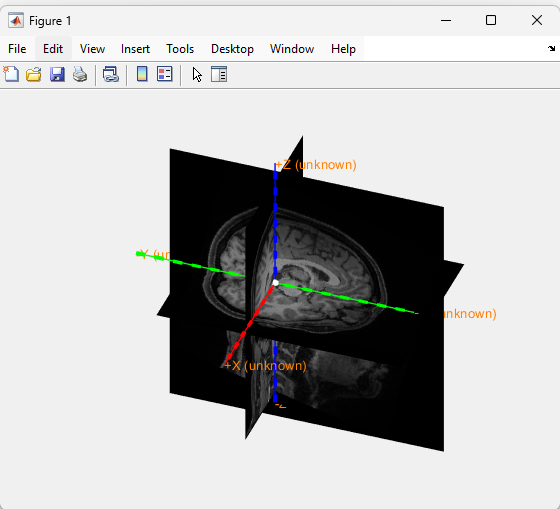

In [9]:
save mri mri

In [10]:
load mri mri

We will pick fiducials that will be used for coregistration of the headmodel with the digitized headscan.
The MRI coordinate system is then brought to Neuromag.

the input is volume data with dimensions [208 300 320]
voxel size along 1st dimension (i) : 0.800000 mm
voxel size along 2nd dimension (j) : 0.800000 mm
voxel size along 3rd dimension (k) : 0.800000 mm
volume per voxel                   : 0.512000 mm^3
the input is volume data with dimensions [208 300 320]
voxel size along 1st dimension (i) : 0.800000 mm
voxel size along 2nd dimension (j) : 0.800000 mm
voxel size along 3rd dimension (k) : 0.800000 mm
volume per voxel                   : 0.512000 mm^3
0. Press "h" to show this help
1. To change the slice viewed in one plane, either:
   a. click (left mouse) in the image on a different plane. Eg, to view a more
      superior slice in the horizontal plane, click on a superior position in the
      coronal plane, or
   b. use the arrow keys to increase or decrease the slice number by one
2. To mark a fiducial position or anatomical landmark, do BOTH:
   a. select the position by clicking on it in any slice with the left mouse button
   b.

 In 'C:\Users\hz3752\Documents\fieldtrip\ft_volumerealign.m' at line 1063

the call to "ft_volumerealign" took 11 seconds
The positive x-axis is pointing towards the right
The positive y-axis is pointing towards anterior
The positive z-axis is pointing towards superior


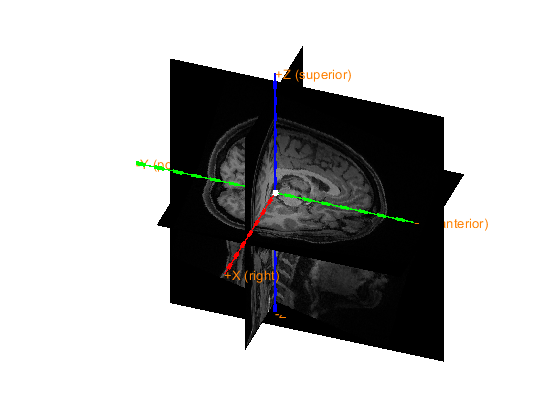

The axes are 150 mm long in each direction
The diameter of the sphere at the origin is 10 mm


In [40]:
%% Pick fiducials on mri
load mri
cfg = [];
cfg.method = 'interactive';
cfg.coordsys = 'neuromag';

mri_init = ft_volumerealign(cfg,mri);

ft_determine_coordsys(mri_init, 'interactive', 'no');

In [13]:
save mri_init mri_init

In [107]:
load mri_init mri_init

The data from anatomical MRI is now ready to be used for coregistration.

Headmodel preparation
---------------------
Before MEG data acquisition from a participant, a digitized headshape has been acquired using a FastScan II by Polhemus
[Link to FastScan II device](https://polhemus.com/scanning-digitizing/fastscan/).
This data can be found under `sub-003/anat/digitized-headshape`, basic_surface holds the headshape points, and stylus holds the fiducials position in the headshape coordinate system.
This data is not directly usable in Fieldtrip at the moment, a special function `read_head_shape_laser` is used to get the headshape structure containing both surface and fiducials.
The function is found under `meg-pipeline/pipeline/field_trip_pipelines/matlab_functions` add this folder to your MATLAB path for convenience.

In [85]:
basic_surface = fullfile([MEG_DATA_FOLDER,'oddball\sub-03\anat\digitized-headshape\sub-03-basic-surface.txt']);
stylus_file = fullfile([MEG_DATA_FOLDER,'oddball\sub-03\anat\digitized-headshape\sub-03-stylus-cleaned.txt']);
headshape = read_head_shape_laser(basic_surface, stylus_file);
headshape   = ft_convert_units(headshape, 'mm');

shape = struct with fields:
      pos: [1681x3 double]
      fid: [1x1 struct]
    label: []

We can now plot the headshape and the fiducials.

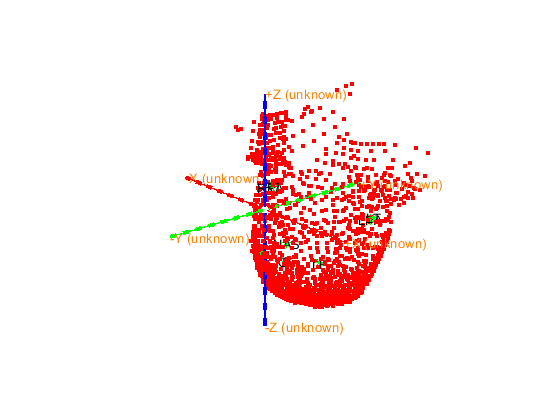

The axes are 150 mm long in each direction
The diameter of the sphere at the origin is 10 mm


In [87]:
%% visualization, coordinate axes are initially ALS
figure
ft_plot_headshape(headshape)
ft_plot_axes(headshape)
view([50 20])

Notice that the coordinate system is random, let us set the coordinate system to CTF using the fiducials we had recorded.
For more information on coordinate systems go to https://www.fieldtriptoolbox.org/faq/coordsys/
Transform the coordinate system to CTF which is a ALS (X-axis: anterior, Y-axis: Left posterior auricular, Z-axis: Superior)

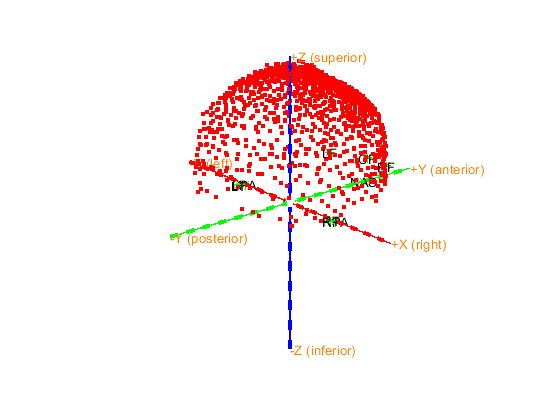

The axes are 150 mm long in each direction
The diameter of the sphere at the origin is 10 mm


In [97]:
nas = headshape.fid.pos(strcmp(headshape.fid.label, 'NAS'),:);
lpa = headshape.fid.pos(strcmp(headshape.fid.label, 'LPA'),:);
rpa = headshape.fid.pos(strcmp(headshape.fid.label, 'RPA'),:);

T = ft_headcoordinates(nas, lpa, rpa, 'neuromag');
headshape = ft_transform_geometry(T, headshape);
headshape.coordsys = 'neuromag';

%% visualization, coordinate axes after transformation to Neuromag
figure
ft_plot_headshape(headshape)
ft_plot_axes(headshape)
view([50 20])

Let us plot the sensor layout (from OPM .fif generated file), headshape (from laserscan).

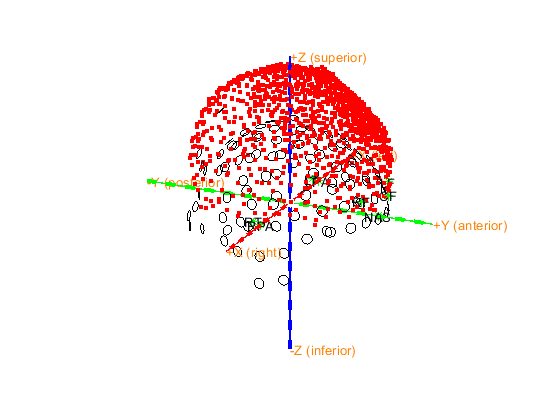

The axes are 150 mm long in each direction
The diameter of the sphere at the origin is 10 mm


In [7]:
%% Plot headmodel with layout from fif

%%To use the specific layout used during the recording, get the grad layout
%%from .fif loading

% Note: this layout from .fif doesn't seem to have the 8 reference points

sensors = ft_convert_units(data_all.grad, 'mm');

figure
ft_plot_sens(sensors);
hold on
ft_plot_axes(headshape)
hold on
ft_plot_headshape(headshape);
view([114 20])

The headshape needs to be cut by a plane in order to remove unncessary points that are beneath the head region.
Change `planecut` to account for your headshape and adapt as necessary.

In [99]:
% Deface the laser mesh under a certain plan (change the 140) Define the configuration for ft_defacemesh
planecut = 5;
cfg = [];
cfg.method    = 'plane';       % Use a plane for exclusion
cfg.translate = [0 0 planecut]; % A point on the plane (adjust z_value as needed)
cfg.rotate    = [0 0 0];       % Rotation vector, modify if the plane is not axis-aligned
cfg.selection = 'outside';     % Remove points below the plane

% Apply ft_defacemesh to remove points below the plane
mesh = ft_defacemesh(cfg, headshape);

Use the mouse to rotate the geometry, and click "redisplay" to update the light.
Close the figure when you are done.
the template coordinate system is "neuromag"
the positive X-axis is pointing to the right
the positive Y-axis is pointing to anterior
the positive Z-axis is pointing to superior
The axes are 150 mm long in each direction
The diameter of the sphere at the origin is 10 mm

Press "h" to show this help.
Press "q" or close the window when you are done.
Press "v" to update the light position.
the call to "ft_interactiverealign" took 11 seconds


ans = logical
   1

ans = logical
   1

keeping 1216 and removing 0 vertices in the mesh
the call to "ft_defacemesh" took 11 seconds


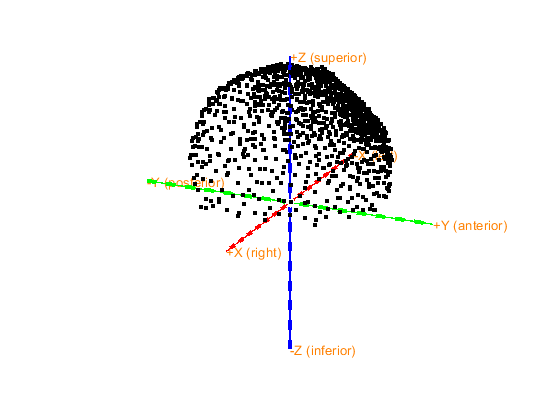

The axes are 150 mm long in each direction
The diameter of the sphere at the origin is 10 mm


headshape = struct with fields:
         pos: [1216x3 double]
         fid: [1x1 struct]
       label: []
        unit: 'mm'
    coordsys: 'neuromag'
         cfg: [1x1 struct]

In [100]:
% Plot the resulting mesh to check the results
figure
ft_plot_mesh(mesh);
hold on
ft_plot_axes(mesh);
view([114 20])
headshape = mesh

The standard layout of the sensors (i.e., sensors not pushed towards the skull of the subject) can be found in the `template/grad` folder in the `fieldtrip` directory. In the following we plot the two sensors layout to see the difference.

reading variable from file 'fieldlinebeta2.mat'


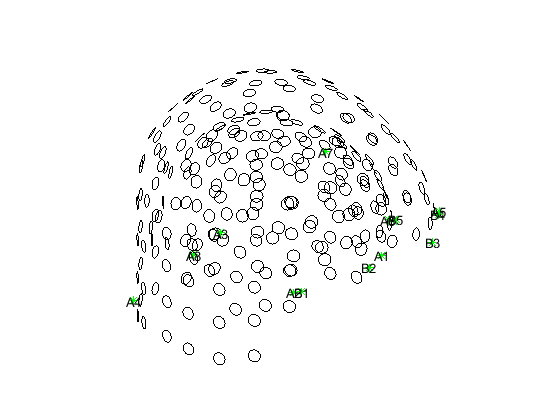

In [94]:
%% Plot layout difference between fieldlinebeta2.mat and the sensor layout from the .fif

% This stage requires the 8 reference points

% Load reference points from OPM layout


% Problem: the layout from the .fif doesn't match the layout from the OPM
% template

%standard layout for helmet
fieldlinebeta2 = ft_read_sens('fieldlinebeta2.mat'); % from fieldtrip/template/grad
fieldlinebeta2 = ft_convert_units(fieldlinebeta2, 'mm');
fid_helmet     = fieldlinebeta2.fid;

%layout from fif with actual sensor place during the scan
sensors = ft_convert_units(data_all.grad, 'mm');

figure
ft_plot_sens(sensors)
hold on
ft_plot_sens(fieldlinebeta2)
view([114 20])

Now we focus on coregistering the headshape with sensor layout.
The method described here is not optimal since for this dataset we did not record fiducials on the sensor layout.
What we will do, is basically fit the sensors who are shaped as a head (since they are pushed towards the skull of the participant) with the headshape using ICP (Iterative Closest Point).
Ideally, we would like to record fiducials in sensor space and coregister them with the stylus points acquired from the laser scan as described in this tutorial 
https://www.fieldtriptoolbox.org/tutorial/coregistration_opm/

We will compute the Rotation and Translation matrix respecitvely TR and TT by fitting the headshape surface with the positions of the sensors.

In [101]:
%% Coregistration


% Aligning the headshape with sensor position
transhp = headshape.pos';

transsensor = sensors.chanpos';

[TR, TT] = icp(transhp, transsensor);

The rigid body transformation is now known, we can apply it to the sensors positions, then plot again the transformed sensors layout with the headshape.

transformed_coords = 3x96 double
  -21.9101  -36.0467   13.0519  -48.1705   13.3108  -65.3469  -20.9570  -79.3815   -5.2276  -22.5258  -19.0636  -37.8783   16.2449  -48.0029   -3.8505  -53.3787   12.0012  -42.7699   14.1847  -48.8186   -5.0455  -47.0439   -1.9355  -61.1725   13.5054  -35.0373  -22.0394  -37.4019  -19.7880  -35.4329
   92.0484   81.8327   99.0199   32.5883   93.7002   -2.0219   85.7575   -5.8085   99.7893   -0.5102   73.4920   75.1234   36.2003   12.9465   97.8649   44.8193   82.1149   -0.6552   74.7485   50.5141  100.7886   62.7096   82.9494   18.6961   99.4816   54.9410   94.2381   17.1725   59.5549   37.2860
   55.9093   59.6118   54.5253   90.6427   72.6812   75.9515   76.5682   -1.2194   35.0713  127.6158   93.4161   79.8235  128.5412   98.3906   75.5276   33.7185   91.3094  123.5061  110.7860   76.9410   55.8442   59.0488   92.9371   52.5581   34.1653   94.1492   36.6776  113.4136  108.8448  107.2211
...

sensors = struct with fields:
     balance: [1x1 struct]
     chanori: [96x3 double]
     chanpos: [96x3 double]
    chantype: {96x1 cell}
    chanunit: {96x1 cell}
     coilori: [96x3 double]
     coilpos: [96x3 double]
       label: {96x1 cell}
         tra: [96x96 double]
        type: 'fieldline_v3'
        unit: 'mm'

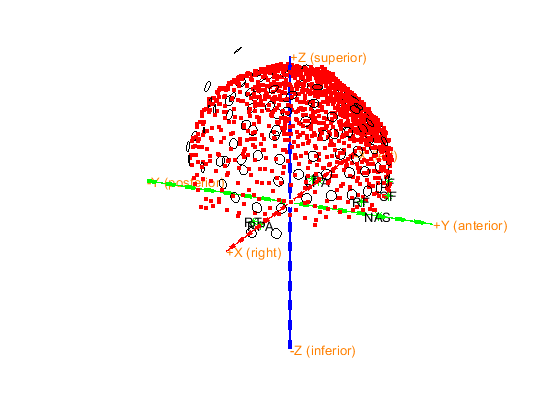

The axes are 150 mm long in each direction
The diameter of the sphere at the origin is 10 mm


In [8]:
%%
% Plotting after aligning with ICP

transformed_coords = TR*transsensor + TT

%transformed_points = ft_transform_geometry(TR, headshape.pos');

%% Plot after transforming

%headshape.pos = transformed_coords'

sensors.chanpos = transformed_coords'

save sensors sensors

figure
ft_plot_headshape(headshape)
ft_plot_axes(headshape)
hold on
ft_plot_sens(sensors)
%hold on
%ft_plot_sens(fieldlinebeta2)
view([114 20])


%The headshape is now aligned with the acquired sensor placements


The sensor layout seem to fit well the headshape after the coregistration.
Now we would like to align the brainshape from MRI with the headshape. For this, we will need to coregister the MRI fiducials with the headshape fiducials.

The headshape coordinates are now coregistered with the sensor coordinates space.
However, the brain shape (i.e., the anatomical MRI headshape) is not yet coregistered with the headshape.

In [110]:
load mri_init

%% align MRI and Laser
cfg = []
cfg.method = 'headshape';
cfg.headshape = headshape;
cfg.headshape.interactive = 'no'
cfg.headshape.icp = 'yes'


% x axis is r
% y axis is a
% z axis is s
% then n
mri_aligned = ft_volumerealign(cfg,mri_init, headshape)



cfg =

     []



cfg = struct with fields:
       method: 'headshape'
    headshape: [1x1 struct]

cfg = struct with fields:
       method: 'headshape'
    headshape: [1x1 struct]

the input is volume data with dimensions [208 300 320]
voxel size along 1st dimension (i) : 0.800000 mm
voxel size along 2nd dimension (j) : 0.800000 mm
voxel size along 3rd dimension (k) : 0.800000 mm
volume per voxel                   : 0.512000 mm^3


 In 'C:\Users\hz3752\Documents\fieldtrip\ft_volumerealign.m' at line 296

the input is volume data with dimensions [208 300 320]
voxel size along 1st dimension (i) : 0.800000 mm
voxel size along 2nd dimension (j) : 0.800000 mm
voxel size along 3rd dimension (k) : 0.800000 mm
volume per voxel                   : 0.512000 mm^3
creating scalpmask ... using the anatomy field for segmentation
smoothing anatomy with a 2-voxel FWHM kernel
thresholding anatomy at a relative threshold of 0.100
the call to "ft_volumesegment" took 2 seconds
triangulating the boundary of compartment 1 (scalp) with 20000 vertices
the call to "ft_prepare_mesh" took 2 seconds
doing interactive realignment with headshape
Use the mouse to rotate the geometry, and click "redisplay" to update the light.
Close the figure when you are done.
the template coordinate system is "neuromag"
the positive X-axis is pointing to the right
the positive Y-axis is pointing to anterior
the positive Z-axis is pointing to superior
this re


            fid: [1x1 struct]
          label: []
           unit: 'mm'
       coordsys: 'neuromag'
            cfg: [1x1 struct]
    interactive: 'no'
            icp: 'yes'
       distance: [1154x1 double]
            pos: [1154x3 double]



 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 789
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 739
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdatfield.m' at line 45
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_datatype_source.m' at line 266
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 293
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_sourceinterpolate.m' at line 168
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_volumerealign.m' at line 782




            fid: [1x1 struct]
          label: []
           unit: 'mm'
       coordsys: 'neuromag'
            cfg: [1x1 struct]
    interactive: 'no'
            icp: 'yes'
       distance: [1154x1 double]
            pos: [1154x3 double]



 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 789
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 739
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdatfield.m' at line 45
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_datatype_source.m' at line 266
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 293
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_sourceinterpolate.m' at line 168
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_volumerealign.m' at line 782




            fid: [1x1 struct]
          label: []
           unit: 'mm'
       coordsys: 'neuromag'
            cfg: [1x1 struct]
    interactive: 'no'
            icp: 'yes'
       distance: [1154x1 double]
            pos: [1154x3 double]



 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 789
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 739
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_datatype_source.m' at line 268
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 293
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_sourceinterpolate.m' at line 168
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_volumerealign.m' at line 782




            fid: [1x1 struct]
          label: []
           unit: 'mm'
       coordsys: 'neuromag'
            cfg: [1x1 struct]
    interactive: 'no'
            icp: 'yes'
       distance: [1154x1 double]
            pos: [1154x3 double]



 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 789
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 739
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_datatype_source.m' at line 268
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 293
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_sourceinterpolate.m' at line 168
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_volumerealign.m' at line 782

interpolating distance
the call to "ft_sourceinterpolate" took 0 seconds
the input is mesh data with 20000 vertices and 39996 triangles
the input is source data with 20000 brainordinates
the input is source data with 1154 brainordinates



            fid: [1x1 struct]
          label: []
           unit: 'mm'
       coordsys: 'neuromag'
            cfg: [1x1 struct]
    interactive: 'no'
            icp: 'yes'
       distance: [1154x1 double]
            pos: [1154x3 double]



 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 789
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 739
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdatfield.m' at line 45
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_datatype_source.m' at line 266
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 293
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_sourceinterpolate.m' at line 168
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_volumerealign.m' at line 786




            fid: [1x1 struct]
          label: []
           unit: 'mm'
       coordsys: 'neuromag'
            cfg: [1x1 struct]
    interactive: 'no'
            icp: 'yes'
       distance: [1154x1 double]
            pos: [1154x3 double]



 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 789
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 739
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdatfield.m' at line 45
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_datatype_source.m' at line 266
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 293
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_sourceinterpolate.m' at line 168
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_volumerealign.m' at line 786




            fid: [1x1 struct]
          label: []
           unit: 'mm'
       coordsys: 'neuromag'
            cfg: [1x1 struct]
    interactive: 'no'
            icp: 'yes'
       distance: [1154x1 double]
            pos: [1154x3 double]



 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 789
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 739
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_datatype_source.m' at line 268
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 293
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_sourceinterpolate.m' at line 168
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_volumerealign.m' at line 786




            fid: [1x1 struct]
          label: []
           unit: 'mm'
       coordsys: 'neuromag'
            cfg: [1x1 struct]
    interactive: 'no'
            icp: 'yes'
       distance: [1154x1 double]
            pos: [1154x3 double]



 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 789
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 739
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_datatype_source.m' at line 268
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 293
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_sourceinterpolate.m' at line 168
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_volumerealign.m' at line 786

interpolating distance
the call to "ft_sourceinterpolate" took 0 seconds
the call to "ft_volumerealign" took 26 seconds


mri_aligned = struct with fields:
              dim: [208 300 320]
          anatomy: [208x300x320 double]
              hdr: [1x1 struct]
        transform: [4x4 double]
             unit: 'mm'
         coordsys: 'neuromag'
              cfg: [1x1 struct]
    transformorig: [4x4 double]

The positive x-axis is pointing towards the right
The positive y-axis is pointing towards anterior
The positive z-axis is pointing towards superior


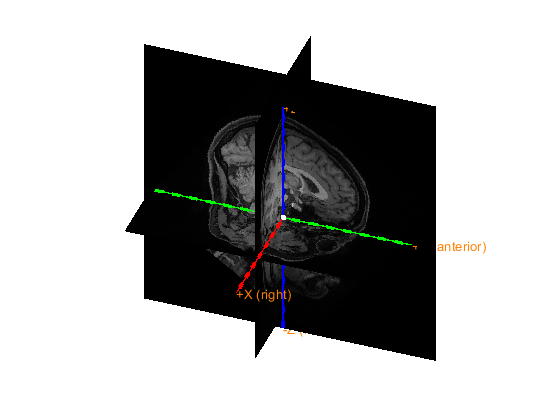

The axes are 150 mm long in each direction
The diameter of the sphere at the origin is 10 mm


ans = struct with fields:
              dim: [208 300 320]
          anatomy: [208x300x320 double]
              hdr: [1x1 struct]
        transform: [4x4 double]
             unit: 'mm'
         coordsys: 'neuromag'
              cfg: [1x1 struct]
    transformorig: [4x4 double]

In [111]:
ft_determine_coordsys(mri_aligned,'interactive', 'no')

save mri_aligned mri_aligned

The MRI is now segmented using SPM (Statistical Parametric Mapping) to find the boundaries of different types of tissue.
ft_volumesegment(cfg, mri) will segmented the anatomy and will output the segmentation result as 3 probabilistic masks in gray, white and csf.
When segmentation is performed after the coregistration of the MRI with the headshape, the headmodel (anatomical head from MRI) is then automatically coregistered aswell.

In [114]:
%%

cfg = [];
cfg.write      = 'no';
[segmentedmri] = ft_volumesegment(cfg, mri_aligned);
save segmentedmri segmentedmri

the input is volume data with dimensions [208 300 320]
voxel size along 1st dimension (i) : 0.800000 mm
voxel size along 2nd dimension (j) : 0.800000 mm
voxel size along 3rd dimension (k) : 0.800000 mm
volume per voxel                   : 0.512000 mm^3
using 'OldNorm' normalisation
the coordinate system appears to be 'mni152'
Smoothing by 0 & 8mm..
Coarse Affine Registration..
Fine Affine Registration..
performing the segmentation on the specified volume, using the old-style segmentation

SPM12: spm_preproc                                 16:08:57 - 16/07/2024
Completed                               :          16:09:57 - 16/07/2024
the call to "ft_volumesegment" took 87 seconds


In [2]:
%% Prepare the headmodel

load segmentedmri
cfg = [];
cfg.method = 'singleshell';
headmodel = ft_prepare_headmodel(cfg, segmentedmri);
save headmodel headmodel

creating brainmask ... using the sum of gray, white and csf tpms
smoothing brain with a 5-voxel FWHM kernel
thresholding brain at a relative threshold of 0.500
triangulating the boundary of compartment 1 (brain) with 3000 vertices
the call to "ft_prepare_mesh" took 3 seconds
the call to "ft_prepare_headmodel" took 3 seconds


cfg = struct with fields:
         grad: [1x1 struct]
    headshape: [1x1 struct]

cfg = struct with fields:
         grad: [1x1 struct]
    headshape: [1x1 struct]
    headmodel: [1x1 struct]

cfg = struct with fields:
         grad: [1x1 struct]
    headshape: [1x1 struct]
    headmodel: [1x1 struct]
          mri: [1x1 struct]
         mesh: [1x1 struct]
         axes: 'yes'

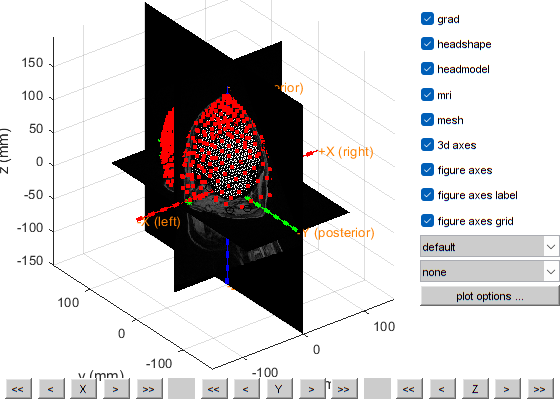

the template coordinate system is "neuromag"
the positive X-axis is pointing to the right
the positive Y-axis is pointing to anterior
the positive Z-axis is pointing to superior
this returns a light skin, you can also explicitly specify 'skin_light',' skin_medium_light', 'skin_medium', 'skin_medium_dark', or 'skin_dark'
plotting anatomy
The axes are 150 mm long in each direction
The diameter of the sphere at the origin is 10 mm

Press "h" to show this help.
Press "q" to quit.
Click and hold the left mouse button to rotate.
the call to "ft_geometryplot" took 1 seconds


In [116]:
cfg = [];
cfg.grad              = sensors;   %structure, see FT_READ_SENS
cfg.headshape         = headshape   %structure, see FT_READ_HEADSHAPE
cfg.headmodel         = headmodel   % structure, see FT_PREPARE_HEADMODEL and FT_READ_HEADMODEL
cfg.mri               = mri_aligned;
cfg.mesh              = headshape;
cfg.axes              = 'yes'

ft_geometryplot(cfg)

The final visualisation shows an accurate coregistration of the MRI.

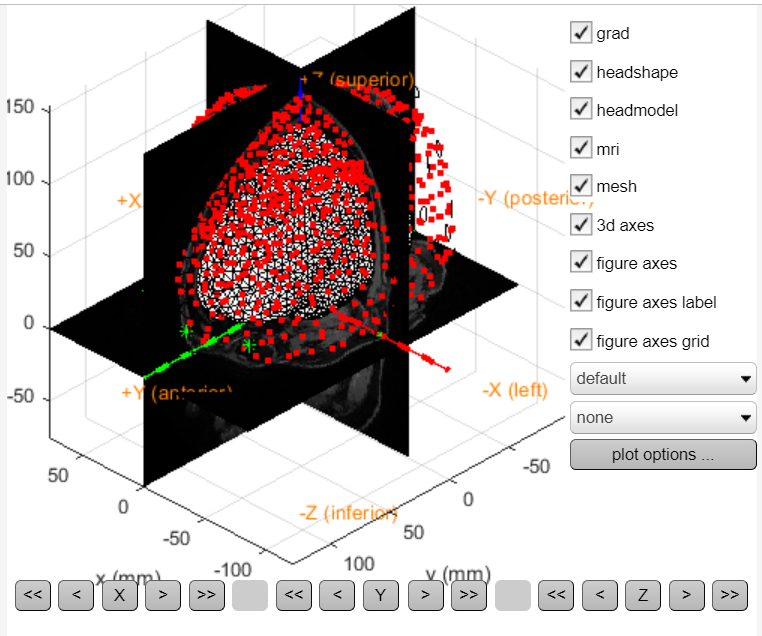

Beamformer source localization
------------------------------

Beamformer is a source localization algorithm that acts upon a predefined grid where each point of the grid is a source.
The grid is cut to the brain region as dictated by the MRI scan.
Beamformer will estimate the activity at each source given sensor measurements.
When estimating the activity for one source of the grid, beamformer would minimize interference from other sources.
Let us redefine the trials (you can also reuse the trials you defined in step 1).

Note: In this section we perform frequency analysis in source space, however according to the literature this is not relevant for oddball tasks. Time-lock analysis in source space would allow us to see the p100 and p300 and the activation of the auditory cortex.

In [1]:
%% Defining Trials

%value = 1 is the 500 Hz audio
%value = 2 is the white noise
%value = 3 is the 200 Hz audio

cfg = [];
cfg.dataset                 = DATASET_PATH;
cfg.trialfun = 'ft_trialfun_general'; % this is the default trial type
cfg.trialdef.eventtype = 'di31';  % Specify the trigger channel
cfg.trialdef.eventvalue = [1, 2, 3];  % Define the value of the trigger
cfg.demean     = 'yes';
cfg.detrend = 'yes';
cfg.baselinewindow = [-0.2 0];
%cfg.lpfilter   = 'yes';                              % apply lowpass filter
%cfg.lpfreq     = 35;                                 % lowpass at 35 Hz.
cfg.trialdef.prestim        = 0.5; % in seconds
cfg.trialdef.poststim       = 1.2; % in seconds

cfg = ft_definetrial(cfg);

data = ft_preprocessing(cfg);

save data data

-------------------------------------------------------------------------------------------
FieldTrip is developed by members and collaborators of the Donders Institute for Brain,
Cognition and Behaviour at Radboud University, Nijmegen, the Netherlands.

                          --------------------------
                        /                            \
                     ------------------------------------
                    /                                    \
          -------------------------------------------------
         /                            /\/\/\/\/\ 
         ---------------------------------------------------
                  |        F  i  e  l  d  T  r  i  p       |
                  ------------------------------------------
                   \                                      /
                     ------------------------------------
                          \            /
                            ----------

Please cite the FieldTrip re


Copyright (c) 2011, Matti Hamalainen and Alexandre Gramfort
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:
    * Redistributions of source code must retain the above copyright
      notice, this list of conditions and the following disclaimer.
    * Redistributions in binary form must reproduce the above copyright
      notice, this list of conditions and the following disclaimer in the
      documentation and/or other materials provided with the distribution.
    * Neither the name of the Massachusetts General Hospital nor the
      names of its contributors may be used to endorse or promote products
      derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FIT

 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198

Opening raw data file C:\Users\hz3752\Box\MEG\Data\oddball\sub-03\meg-opm\sub-03_ses-2024-05-24_meg_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_chantype.m' at line 198
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 2837
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198

reading the events from 'C:\Users\hz3752\Box\MEG\Data\oddball\sub-03\meg-opm\sub-03_ses-2024-05-24_meg_raw.fif'


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_event.m' at line 1685
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 117
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_event.m' at line 1685
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 117
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_event.m' at line 1685
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 117
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_event.m' at line 1685
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 117
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198

Opening raw data file C:\Users\hz3752\Box\MEG\Data\oddball\sub-03\meg-opm\sub-03_ses-2024-05-24_meg_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.
Reading 0 ... 1368099  =      0.000 ...   273.620 secs... [done]
found 80 events
created 80 trials
the call to "ft_definetrial" took 12 seconds


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392

Opening raw data file C:\Users\hz3752\Box\MEG\Data\oddball\sub-03\meg-opm\sub-03_ses-2024-05-24_meg_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_chantype.m' at line 198
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 2837
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392

processing channel { 'L202_bz' 'L302_bz' 'R102_bz' 'L404_bz' 'R103_bz' 'L505_bz' 'L203_bz' 'L606_bz' 'L101_bz' 'L208_bz' 'L204_bz' 'L303_bz' 'R107_bz' 'L405_bz' 'L103_bz' 'L502_bz' 'R104_bz' 'L307_bz' 'R105_bz' 'L403_bz' 'L102_bz' 'L402_bz' 'L104_bz' 'L604_bz' 'R101_bz' 'L304_bz' 'L201_bz' 'L306_bz' 'L205_bz' 'L305_bz' 'di31' 'L105_bz' 'L503_bz' 'R307_bz' 'R205_bz' 'L214_bz' 'R301_bz' 'L111_bz' 'R202_bz' 'L113_bz' 'R402_bz' 'R211_bz' 'R203_bz' 'R408_bz' 'R302_bz' 'R213_bz' 'R206_bz' 'R113_bz' 'R304_bz' 'R210_bz' 'R208_bz' 'R209_bz' 'R204_bz' 'R212_bz' 'R305_bz' 'R409_bz' 'R303_bz' 'R308_bz' 'R207_bz' 'R309_bz' 'R201_bz' 'R407_bz' 'R306_bz' 'R311_bz' 'R401_bz' 'R502_bz' 'R504_bz' 'R605_bz' 'R603_bz' 'R503_bz' 'R405_bz' 'R506_bz' 'R507_bz' 'R403_bz' 'R604_bz' 'R11

Take the positions of the sensors after the coregistration and not the initial positions.

In [5]:
%% Group specific type of trials and adjust sensor positions to take into account coregistration

load sensors sensors %Loading the sensors after coregistration

cfg = [];
cfg.trials  = data.trialinfo == 1;
cfg.latency = [-0.4 -0.05];
dataPre     = ft_selectdata(cfg, data);

cfg.trials  = data.trialinfo == 1;
cfg.latency = [0.05 0.4];
dataPost    = ft_selectdata(cfg, data);


dataPre.grad = sensors;
dataPost.grad = sensors;

the call to "ft_selectdata" took 0 seconds
the call to "ft_selectdata" took 0 seconds


In [6]:
%% Compute spectral density matrix 
cfg = [];
cfg.method    = 'mtmfft';
cfg.output    = 'powandcsd';
cfg.tapsmofrq = 4;
cfg.foilim    = [18 18];
freqPre = ft_freqanalysis(cfg, dataPre);

cfg = [];
cfg.method    = 'mtmfft';
cfg.output    = 'powandcsd';
cfg.tapsmofrq = 4;
cfg.foilim    = [18 18];
freqPost = ft_freqanalysis(cfg, dataPost);

the input is raw data with 109 channels and 60 trials


 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\makessense.m' at line 115
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_datatype_raw.m' at line 90
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 279
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_selectdata.m' at line 132
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_freqanalysis.m' at line 266

the call to "ft_selectdata" took 0 seconds
Default cfg.pad='maxperlen' can run slowly. Consider using cfg.pad='nextpow2' for more efficient FFT computation.
processing trials
processing trial 1/60 nfft: 1751 samples, datalength: 1751 samples, 2 tapeprocessing trial 7/60 nfft: 1751 samples, datalength: 1751 samples, 2 tapeprocessing trial 19/60 nfft: 1751 samples, datalength: 1751 samples, 2 taperprocessing trial 31/60 nfft: 1751 samples, datalength: 1751 samples, 2 taperprocessing trial 41/60 nfft: 1751 samples, datalength: 1751 samples, 2 taperprocessing trial 52/60 nfft: 1751 samples, dataleng

 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\makessense.m' at line 115
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_datatype_raw.m' at line 90
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 279
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_selectdata.m' at line 132
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_freqanalysis.m' at line 266

the call to "ft_selectdata" took 0 seconds
Default cfg.pad='maxperlen' can run slowly. Consider using cfg.pad='nextpow2' for more efficient FFT computation.
processing trials
processing trial 11/60 nfft: 1751 samples, datalength: 1751 samples, 2 taperprocessing trial 25/60 nfft: 1751 samples, datalength: 1751 samples, 2 taperprocessing trial 38/60 nfft: 1751 samples, datalength: 1751 samples, 2 taperprocessing trial 51/60 nfft: 1751 samples, datalength: 1751 samples, 2 taperprocessing trial 60/60 nfft: 1751 samples, datalength: 1751 samples, 2 tapers
the call to "ft_freqanalysis" took 1 seconds


In [10]:
%% Define the beamformer grid

load headmodel headmodel
load sensors sensors


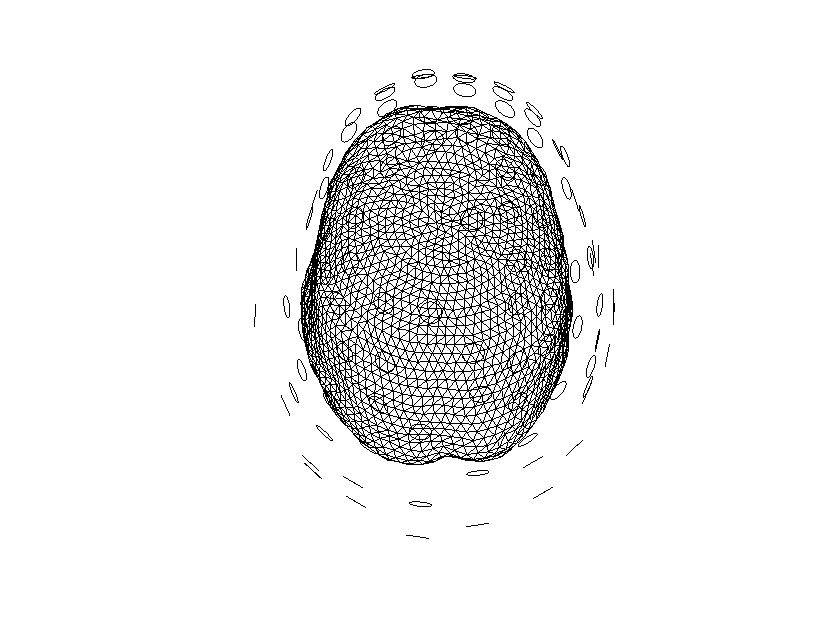

In [11]:
%% figure %% Fix units for headmodel
ft_plot_sens(sensors);
hold on
ft_plot_headmodel(headmodel);

In [12]:
%%

cfg                  = [];
cfg.grad             = freqPost.grad;
cfg.headmodel        = headmodel;

% use a 3-D grid with a 1 cm resolution
cfg.resolution       = 0.6;   
cfg.sourcemodel.unit = 'cm';
sourcemodel = ft_prepare_leadfield(cfg);

%ft_prepare_sourcemodel has the possibility to do an inward shift to match
%better the boundaries: cfg.inwardshift if needed

using gradiometers specified in the configuration
converting units from 'mm' to 'cm'
converting units from 'mm' to 'cm'
computing surface normals
creating sourcemodel based on automatic 3D grid with the specified resolution
using gradiometers specified in the configuration
creating 3D grid with 0.6 cm resolution
initial 3D grid dimensions are [29 36 28]
5285 dipoles inside, 23947 dipoles outside brain
making tight grid
5285 dipoles inside, 5115 dipoles outside brain
the call to "ft_prepare_sourcemodel" took 2 seconds
computing leadfield
computing leadfield 6/52computing leadfield 35/528computing leadfield 64/528computing leadfield 98/528computing leadfield 125/52computing leadfield 155/52computing leadfield 186/52computing leadfield 222/52computing leadfield 261/52computing leadfield 299/52computing leadfield 325/52computing leadfield 363/52computing leadfield 401/52computing leadfield 439/52computing leadfield 478/52computing leadfield 507/52computing leadfield 537/52computing leadfie

In [13]:
%% Source analysis Without contrasting condition

cfg              = [];
cfg.method       = 'dics';
cfg.frequency    = 18;

cfg.channel          = {'L*','R*'};
cfg.sourcemodel  = sourcemodel;
cfg.headmodel    = headmodel;
cfg.dics.projectnoise = 'yes';
cfg.dics.lambda       = 0;

sourcePost_nocon = ft_sourceanalysis(cfg, freqPost);

the input is freq data with 109 channels, 1 frequencybins and no timebins


 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\nearest.m' at line 94
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_selectdata.m' at line 1132
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_selectdata.m' at line 287
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_sourceanalysis.m' at line 335

the call to "ft_selectdata" took 0 seconds
converting the linearly indexed channelcombinations into a square CSD-matrix
using precomputed leadfields
the call to "ft_selectdata" took 0 seconds
using precomputed leadfields
scanning grid
scanning grid 523/52scanning grid 1871/528scanning grid 3598/528scanning grid 5285/5285
the call to "ft_sourceanalysis" took 2 seconds


the input is volume data with dimensions [208 300 320]
voxel size along 1st dimension (i) : 0.800000 mm
voxel size along 2nd dimension (j) : 0.800000 mm
voxel size along 3rd dimension (k) : 0.800000 mm
volume per voxel                   : 0.512000 mm^3
the input is source data with 10400 brainordinates on a [20 26 20] grid
could not reshape "freq" to the dimensions of the volume
updating homogenous coordinate transformation matrix
downsampling anatomy
downsampling inside
the call to "ft_volumedownsample" took 0 seconds
selecting subvolume of 19.1%
interpolating
interpolating 100.0
reslicing and interpolating pow
interpolating
interpolating 100.0
the call to "ft_sourceinterpolate" took 1 seconds
the input is source data with 2496000 brainordinates on a [104 150 160] grid
the call to "ft_selectdata" took 0 seconds
scaling anatomy to [0 1]
not using an atlas
not using a region-of-interest


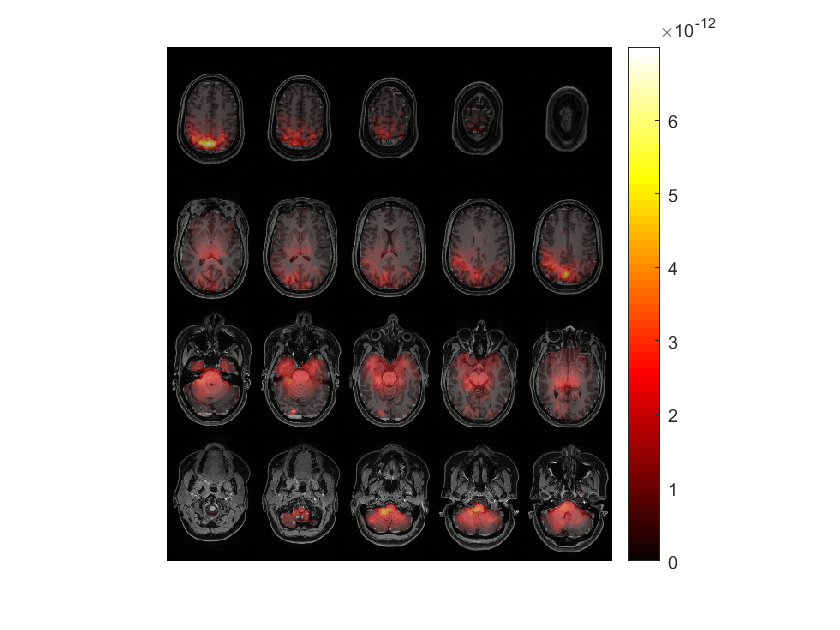

scaling anatomy
the call to "ft_sourceplot" took 2 seconds


In [14]:
%% Interpolate power from grid points to the mri voxels



load mri_aligned mri_aligned

cfg            = [];
cfg.downsample = 2;
cfg.parameter  = 'pow';
sourcePostInt_nocon  = ft_sourceinterpolate(cfg, sourcePost_nocon, mri_aligned);



%%Plot  the source

cfg              = [];
cfg.method       = 'slice';
cfg.funparameter = 'pow';
ft_sourceplot(cfg, sourcePostInt_nocon);

In [15]:
%% Correcting the Bias in center noise by computing the noise index


sourceNAI = sourcePost_nocon;
sourceNAI.avg.pow = sourcePost_nocon.avg.pow ./ sourcePost_nocon.avg.noise;

cfg = [];
cfg.downsample = 2;
cfg.parameter = 'pow';
sourceNAIInt = ft_sourceinterpolate(cfg, sourceNAI , mri_aligned);

the input is volume data with dimensions [208 300 320]
voxel size along 1st dimension (i) : 0.800000 mm
voxel size along 2nd dimension (j) : 0.800000 mm
voxel size along 3rd dimension (k) : 0.800000 mm
volume per voxel                   : 0.512000 mm^3
the input is source data with 10400 brainordinates on a [20 26 20] grid
could not reshape "freq" to the dimensions of the volume
updating homogenous coordinate transformation matrix
downsampling anatomy
downsampling inside
the call to "ft_volumedownsample" took 0 seconds
selecting subvolume of 19.1%
interpolating
interpolating 100.0
reslicing and interpolating pow
interpolating
interpolating 100.0
the call to "ft_sourceinterpolate" took 1 seconds


the input is source data with 2496000 brainordinates on a [104 150 160] grid
the call to "ft_selectdata" took 0 seconds
scaling anatomy to [0 1]
not using an atlas
not using a region-of-interest


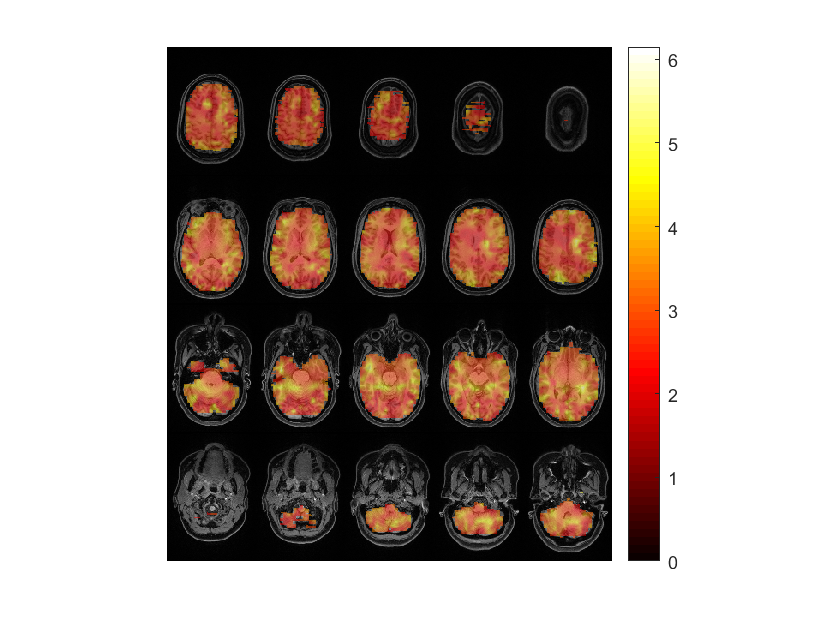

scaling anatomy
the call to "ft_sourceplot" took 1 seconds


In [16]:
%% Plotting source activity after noise correction

%% For LF stimulus without contrasting AFter Noise Correction

maxval = max(sourceNAIInt.pow, [], 'all');

cfg = [];
cfg.method        = 'slice';
cfg.funparameter  = 'pow';
%cfg.maskparameter = cfg.funparameter;
% cfg.funcolorlim   = [4.0 maxval]; %
% cfg.opacitylim    = [4.0 maxval]; %Only make the color seeable in that interval
% cfg.opacitymap    = 'rampup';
ft_sourceplot(cfg, sourceNAIInt);

In [17]:
%% With contrasting

dataAll = ft_appenddata([], dataPre, dataPost);

cfg = [];
cfg.method    = 'mtmfft';
cfg.output    = 'powandcsd';
cfg.channel          = {'L*','R*'};
cfg.tapsmofrq = 4;
cfg.foilim    = [18 18];
freqAll = ft_freqanalysis(cfg, dataAll);


cfg              = [];
cfg.method       = 'dics';
cfg.frequency    = 18;
cfg.channel          = {'L*','R*'};
cfg.sourcemodel  = sourcemodel;
cfg.headmodel    = headmodel;
cfg.dics.projectnoise = 'yes';
cfg.dics.lambda       = '5%';
cfg.dics.keepfilter   = 'yes';
cfg.dics.realfilter   = 'yes';
sourceAll = ft_sourceanalysis(cfg, freqAll);


cfg.sourcemodel.filter = sourceAll.avg.filter;
sourcePre_con  = ft_sourceanalysis(cfg, freqPre );
sourcePost_con = ft_sourceanalysis(cfg, freqPost);

save sourcePre_con sourcePre_con
save sourcePost_con sourcePost_con

 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\makessense.m' at line 115
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_datatype_raw.m' at line 90
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 279
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_appenddata.m' at line 109



 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\makessense.m' at line 115
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_datatype_raw.m' at line 90
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 279
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_appenddata.m' at line 109

concatenating over the "rpt" dimension
the call to "ft_selectdata" took 0 seconds
the call to "ft_appenddata" took 0 seconds
the input is raw data with 109 channels and 120 trials


 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\fixsampleinfo.m' at line 94
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_datatype_raw.m' at line 148
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 279
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_freqanalysis.m' at line 243



 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\fixsampleinfo.m' at line 105
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_datatype_raw.m' at line 148
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 279
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_freqanalysis.m' at line 243

the call to "ft_selectdata" took 0 seconds
Default cfg.pad='maxperlen' can run slowly. Consider using cfg.pad='nextpow2' for more efficient FFT computation.
processing trials
processing trial 8/120 nfft: 1751 samples, datalength: 1751 samples, 2 taperprocessing trial 19/120 nfft: 1751 samples, datalength: 1751 samples, 2 tapeprocessing trial 30/120 nfft: 1751 samples, datalength: 1751 samples, 2 tapeprocessing trial 42/120 nfft: 1751 samples, datalength: 1751 samples, 2 tapeprocessing trial 55/120 nfft: 1751 samples, datalength: 1751 samples, 2 tapeprocessing trial 68/120 nfft: 1751 samples, datalength: 1751 samples, 2 tapeprocessing trial 80/120 nfft: 1751 samples, dat

 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\nearest.m' at line 94
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_selectdata.m' at line 1132
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_selectdata.m' at line 287
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_sourceanalysis.m' at line 335

the call to "ft_selectdata" took 0 seconds
converting the linearly indexed channelcombinations into a square CSD-matrix
using precomputed leadfields
the call to "ft_selectdata" took 0 seconds
using precomputed leadfields
scanning grid
scanning grid 1144/528scanning grid 2388/528scanning grid 4341/528scanning grid 5285/5285
the call to "ft_sourceanalysis" took 1 seconds
the input is freq data with 109 channels, 1 frequencybins and no timebins


 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\nearest.m' at line 94
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_selectdata.m' at line 1132
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_selectdata.m' at line 287
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_sourceanalysis.m' at line 335

the call to "ft_selectdata" took 0 seconds
converting the linearly indexed channelcombinations into a square CSD-matrix
using precomputed filters, not computing any leadfields
the call to "ft_selectdata" took 0 seconds
using precomputed filters
scanning grid
scanning grid 1303/528scanning grid 3699/528scanning grid 5285/5285
the call to "ft_sourceanalysis" took 1 seconds
the input is freq data with 109 channels, 1 frequencybins and no timebins


 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\nearest.m' at line 94
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_selectdata.m' at line 1132
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_selectdata.m' at line 287
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_sourceanalysis.m' at line 335

the call to "ft_selectdata" took 0 seconds
converting the linearly indexed channelcombinations into a square CSD-matrix
using precomputed filters, not computing any leadfields
the call to "ft_selectdata" took 0 seconds
using precomputed filters
scanning grid
scanning grid 1435/528scanning grid 3533/528scanning grid 5285/5285
the call to "ft_sourceanalysis" took 1 seconds


In [18]:
%%
sourceDiff = sourcePost_con;
sourceDiff.avg.pow = (sourcePost_con.avg.pow - sourcePre_con.avg.pow) ./ sourcePre_con.avg.pow;


cfg            = [];
%cfg.downsample = 2;
cfg.parameter  = 'pow';
cfg.channel          = {'L*','R*'};
sourceDiffInt  = ft_sourceinterpolate(cfg, sourceDiff , mri_aligned);



the input is volume data with dimensions [208 300 320]
voxel size along 1st dimension (i) : 0.800000 mm
voxel size along 2nd dimension (j) : 0.800000 mm
voxel size along 3rd dimension (k) : 0.800000 mm
volume per voxel                   : 0.512000 mm^3
the input is source data with 10400 brainordinates on a [20 26 20] grid



            freq: 17.1331
             cfg: [1x1 struct]
             dim: [20 26 20]
          inside: [10400x1 logical]
             pos: [10400x3 double]
            unit: 'cm'
             pow: [10400x1 double]
           noise: [10400x1 double]
          filter: {10400x1 cell}
           label: {96x1 cell}
    filterdimord: '{pos}_ori_chan'
       transform: [4x4 double]



 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 789
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 739
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 1434
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 401
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_sourceinterpolate.m' at line 170




            freq: 17.1331
             cfg: [1x1 struct]
             dim: [20 26 20]
          inside: [10400x1 logical]
             pos: [10400x3 double]
            unit: 'cm'
             pow: [10400x1 double]
           noise: [10400x1 double]
          filter: {10400x1 cell}
           label: {96x1 cell}
    filterdimord: '{pos}_ori_chan'
       transform: [4x4 double]



 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 789
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\private\getdimord.m' at line 739
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 1434
 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkdata.m' at line 401
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_sourceinterpolate.m' at line 170

could not reshape "freq" to the dimensions of the volume
selecting subvolume of 19.1%
interpolating
interpolating 70.interpolating 100.0
reslicing and interpolating pow
interpolating
interpolating 55.interpolating 100.0
the call to "ft_sourceinterpolate" took 3 seconds


the input is source data with 19968000 brainordinates on a [208 300 320] grid
the call to "ft_selectdata" took 0 seconds
scaling anatomy to [0 1]
not using an atlas
not using a region-of-interest


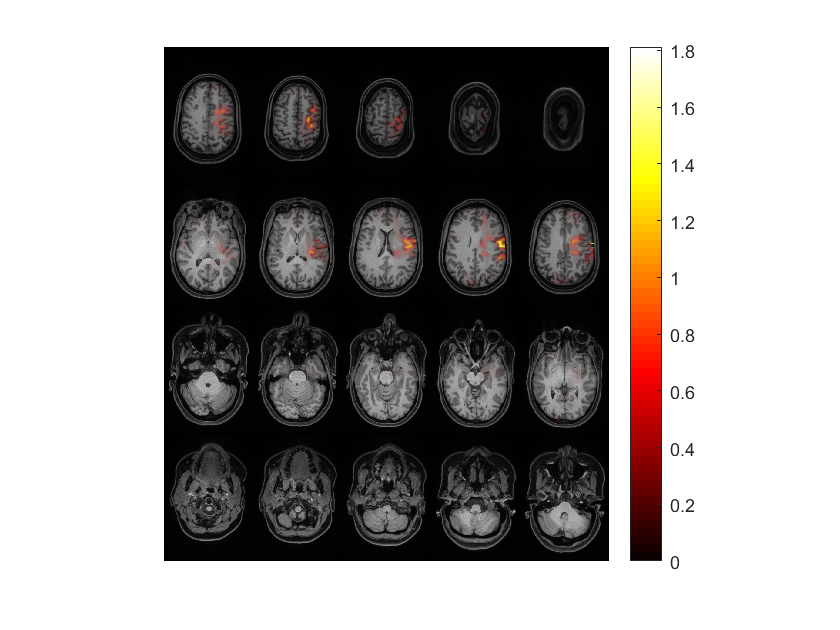

scaling anatomy
the call to "ft_sourceplot" took 3 seconds


In [19]:
%% Plot the source frequencies with contrasting (pre and post)

maxval = max(sourceDiffInt.pow, [], 'all');

cfg = [];
cfg.method        = 'slice';
cfg.funparameter  = 'pow';
cfg.channel          = {'L*','R*'};
cfg.maskparameter = cfg.funparameter;
cfg.funcolorlim   = [0.0 maxval];
cfg.opacitylim    = [0.0 maxval];
cfg.opacitymap    = 'rampup';
ft_sourceplot(cfg, sourceDiffInt);

Ways to improve this notebook
-----------------------------
- adapt the filenames of datasets to BIDS
- confirm that fieldlinebeta2 is the proper sensor layout for the OPM at NYUAD
- add time-lock analysis to complement the frequency analysis
- instead of using `cfg.layout = 'fieldlinebeta2bz_helmet.mat';` we can maybe use the layout given by the .fif?
- when contrasting, we need to have the same number of trials in each type to not bias the noise, this haven't been implemented in this pipeline yet
- The FastScan laser headscan and fiducials needs to be converted to the .pos standard matrix file type in fieldtrip
- Question, in Donders does the OPM sensors can be displaced to account for head position or not?
